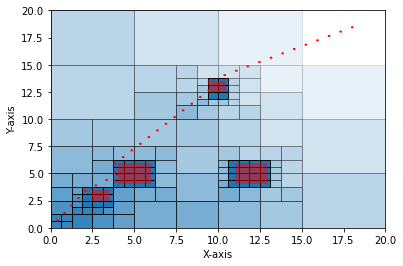

In [13]:
import matplotlib.pyplot as plt

# Open the text file
with open('../output.txt', 'r') as f:
    # read name
    name = f.readline()
    
    # read obstacles
    obstacles = []
    while True:
        if (line := f.readline()) == "\n": break
        x, y, x_extent, y_extent = map(float, line.strip().split(',')[:-1])
        obstacles.append((x, y, x_extent, y_extent))
    
    # read rectangles
    rectangles = []
    while True:
        if (line := f.readline()) == "\n": break
        x, x_extent, y, y_extent, h_value = map(float, line.strip().split(',')[:-1])
        rectangles.append((x, x_extent, y, y_extent, h_value))
    
    dots = []
    while True:
        if (line := f.readline()) == "\n": break
        x, y = map(float, line.strip().split(',')[:-1])
        dots.append((x,y))
    
    nodes = []
    for line in f.readlines():
        x, y = map(float, line.strip().split(',')[:-1])
        nodes.append((x,y))

# Create a figure and axis object
fig, ax = plt.subplots()

# Draw each rectangle on the axis
for rect in rectangles:
    x, x_extent, y, y_extent, h_value = rect
    try:
        ax.add_patch(
            plt.Rectangle((x, y), x_extent, y_extent, alpha=h_value/10, edgecolor='black')
        )
    except ValueError:
        ax.add_patch(
            plt.Rectangle((x, y), x_extent, y_extent, alpha=1, edgecolor='black')
        )

for obs in obstacles:
    x, y, x_extent, y_extent = obs
    ax.add_patch(
        plt.Rectangle((x, y), x_extent, y_extent, alpha=0.5, facecolor='red')
    )

for dot in dots:
    x, y = dot
    ax.add_patch(
        plt.Circle((x, y), 0.05, color='red')
    )

for node in nodes:
    x, y = node
    ax.add_patch(
        plt.Circle((x, y), 0.03, color='yellow')
    )

# Set the axis limits and labels
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.show()
